In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('S&P500.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-30,2251.610107,2253.580078,2233.620117,2238.830078,2238.830078,2671550000
1,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000
2,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000
3,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000
4,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000
...,...,...,...,...,...,...,...
247,2017-12-22,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2401030000
248,2017-12-26,2679.090088,2682.739990,2677.959961,2680.500000,2680.500000,1970660000
249,2017-12-27,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202900000
250,2017-12-28,2686.100098,2687.659912,2682.689941,2687.540039,2687.540039,2174890000


In [2]:
# Assuming df is your DataFrame
df['Volatility'] = df['Adj Close'].pct_change().rolling(window=2).std() * 100

In [3]:
volatility  = df[['Date','Volatility']]
import datetime
volatility['Date'] = pd.to_datetime(volatility['Date'])
volatility.set_index('Date', inplace = True)

c:\Users\zc22364\AppData\Local\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


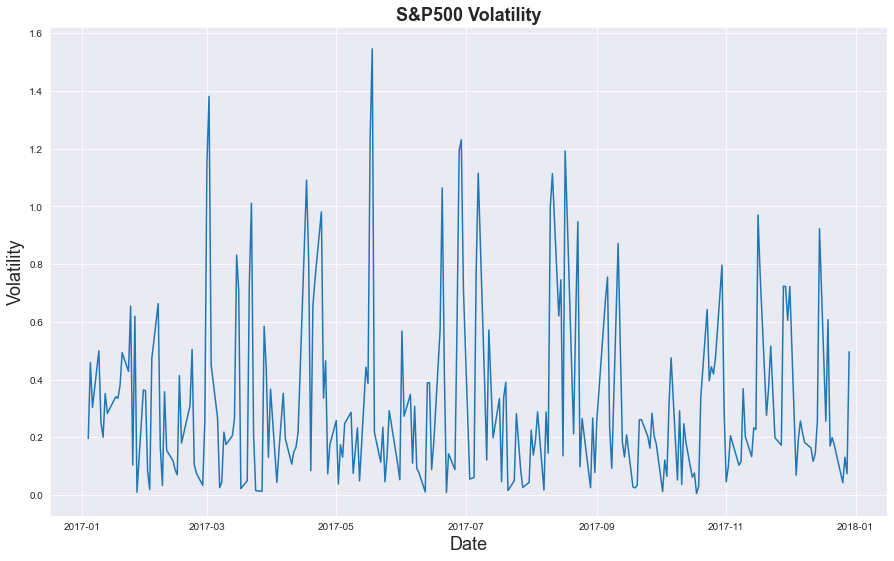

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(15,9))
plt.plot(volatility['Volatility'])
plt.title("S&P500 Volatility", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volatility', fontsize=18)
plt.show()

In [12]:
price = df[['Volatility']]
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Volatility  250 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [6]:
close  = df[['Date','Adj Close']]
import datetime
close['Date'] = pd.to_datetime(close['Date'])
close.set_index('Date', inplace = True)

c:\Users\zc22364\AppData\Local\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


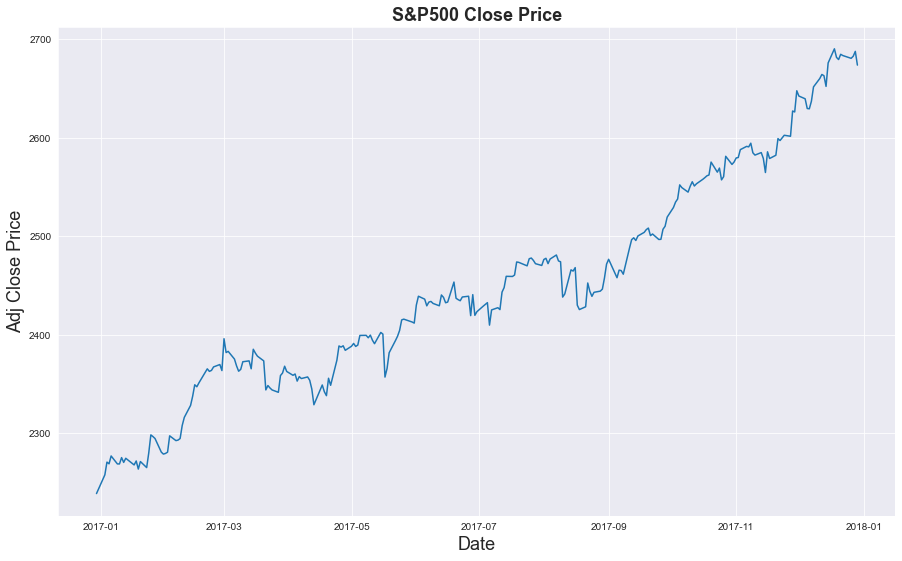

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(15,9))
plt.plot(close['Adj Close'])
plt.title("S&P500 Close Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price', fontsize=18)
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
close['Adj Close'] = scaler.fit_transform(close['Adj Close'].values.reshape(-1,1))
price['Volatility'] = scaler.fit_transform(price['Volatility'].values.reshape(-1,1))

c:\Users\zc22364\AppData\Local\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\zc22364\AppData\Local\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy()
    data = []
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])
    data = np.array(data)
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)
    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]
    x_test = data[train_set_size:, :-1, :]
    y_test = data[train_set_size:, -1, :]
    return x_train, y_train, x_test, y_test

In [15]:
lookback = 20  # Number of previous days to consider
data1 = split_data(price, lookback)
data2 = split_data(close, lookback)

In [17]:
x_train_v, y_train_v, x_test_v, y_test_v = split_data(price, lookback)
print('x_train.shape =',x_train_v.shape)
print('y_train.shape =',y_train_v.shape)
print('x_test.shape =',x_test_v.shape)
print('y_test.shape =',y_test_v.shape)

x_train.shape = (186, 19, 1)
y_train.shape = (186, 1)
x_test.shape = (46, 19, 1)
y_test.shape = (46, 1)


In [18]:
x_train_c, y_train_c, x_test_c, y_test_c = split_data(close, lookback)
print('x_train.shape =',x_train_v.shape)
print('y_train.shape =',y_train_v.shape)
print('x_test.shape =',x_test_v.shape)
print('y_test.shape =',y_test_v.shape)

x_train.shape = (186, 19, 1)
y_train.shape = (186, 1)
x_test.shape = (46, 19, 1)
y_test.shape = (46, 1)


In [20]:
import torch
import torch.nn as nn

x_train_v = torch.from_numpy(x_train_v).type(torch.Tensor)
x_test_v = torch.from_numpy(x_test_v).type(torch.Tensor)
y_train_lstm_v = torch.from_numpy(y_train_v).type(torch.Tensor)
y_test_lstm_v = torch.from_numpy(y_test_v).type(torch.Tensor)

x_train_c = torch.from_numpy(x_train_c).type(torch.Tensor)
x_test_c = torch.from_numpy(x_test_c).type(torch.Tensor)
y_train_lstm_c = torch.from_numpy(y_train_c).type(torch.Tensor)
y_test_lstm_c = torch.from_numpy(y_test_c).type(torch.Tensor)

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
hist = np.zeros(num_epochs)
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.v = nn.Parameter(torch.rand(hidden_dim, 1))

    def forward(self, hidden, encoder_outputs):
        energy = torch.matmul(hidden, encoder_outputs.permute(1, 2, 0))
        attention = torch.softmax(energy, dim=2)
        attention = attention.permute(0, 2, 1)
        return attention

class MultiTaskLSTMWithAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultiTaskLSTMWithAttention, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.attention = Attention(hidden_dim)
        
        # Two linear layers for two tasks
        self.fc_volatility = nn.Linear(hidden_dim, output_dim)
        self.fc_trend = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x.squeeze(2)).unsqueeze(1)
        output, (hidden, cell) = self.lstm(embedded)
        attention_weights = self.attention(hidden[-1], output.permute(1, 0, 2))
        weighted = torch.matmul(attention_weights.squeeze(2), output.squeeze(1))

        # Task-specific linear layers
        volatility_output = self.fc_volatility(weighted.squeeze(1))
        trend_output = self.fc_trend(weighted.squeeze(1))
        
        return volatility_output, trend_output

# Example usage
input_dim = 19
hidden_dim = 512
output_dim = 1
num_epochs = 100

# Assuming x_train_v, y_train_v, x_test_v, y_test_v are for volatility task
# and x_train_c, y_train_c, x_test_c, y_test_c are for trend task

model = MultiTaskLSTMWithAttention(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

for t in range(num_epochs):
    optimizer.zero_grad()
    
    # Volatility task
    x_train_v = torch.where(torch.isnan(x_train_v), torch.tensor(0.0), x_train_v)
    y_train_pred_v, _ = model(x_train_v)
    y_train_v = torch.tensor(y_train_v, dtype=torch.float32)
    loss_v = criterion(y_train_pred_v.squeeze(), y_train_v.squeeze())
    
    # Trend task
    x_train_c = torch.where(torch.isnan(x_train_c), torch.tensor(0.0), x_train_c)
    _, y_train_pred_c = model(x_train_c)
    y_train_c = torch.tensor(y_train_c, dtype=torch.float32)
    loss_c = criterion(y_train_pred_c.squeeze(), y_train_c.squeeze())
    
    # Total loss is the sum of losses from both tasks
    weight_volatility = 0.5
    loss = loss_v * weight_volatility + loss_c * (1-weight_volatility)
    
    loss.backward()
    optimizer.step()

    print(f'Epoch {t + 1}/{num_epochs}, Total Loss: {loss.item()}, Volatility Loss: {loss_v.item()}, Trend Loss: {loss_c.item()}')
    hist[t] = loss.item()


c:\Users\zc22364\AppData\Local\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\Users\zc22364\AppData\Local\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch 1/100, Total Loss: 3.699233055114746, Volatility Loss: 7.0753326416015625, Trend Loss: 0.3231334984302521
Epoch 2/100, Total Loss: 1032.7503662109375, Volatility Loss: 2056.348876953125, Trend Loss: 9.151734352111816
Epoch 3/100, Total Loss: 71.6448745727539, Volatility Loss: 138.79627990722656, Trend Loss: 4.493464469909668
Epoch 4/100, Total Loss: 193.2527313232422, Volatility Loss: 386.34857177734375, Trend Loss: 0.15688231587409973
Epoch 5/100, Total Loss: 504.30706787109375, Volatility Loss: 1004.5225219726562, Trend Loss: 4.091594696044922
Epoch 6/100, Total Loss: 388.2718505859375, Volatility Loss: 767.6566162109375, Trend Loss: 8.887092590332031
Epoch 7/100, Total Loss: 137.945068359375, Volatility Loss: 267.421142578125, Trend Loss: 8.468981742858887
Epoch 8/100, Total Loss: 7.122725486755371, Volatility Loss: 9.68371868133545, Trend Loss: 4.561732292175293
Epoch 9/100, Total Loss: 36.776432037353516, Volatility Loss: 72.73321533203125, Trend Loss: 0.819652259349823
Epoc

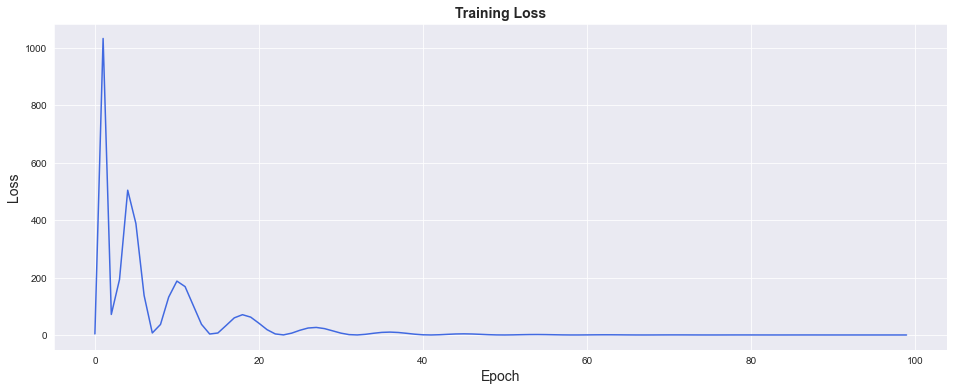

In [24]:
fig = plt.figure()
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size=14)
ax.set_ylabel("Loss", size=14)
ax.set_title("Training Loss", size = 14, fontweight = 'bold')
fig.set_figheight(6)
fig.set_figwidth(16)